# Lecture 5 - Linear Algebra for Machine Learning
## Sep 10, 2024

## Linear Algebra for Machine Learning
Linear algebra is a core mathematical concept in machine learning, especially deep learning

## Scaler, vector, matrix and tensor (Review)

* Scaler - A scalar is a single number 
* Vector - 1-D list of numbers
* Matrix - 2-D list of numbers
* Tensor - N-D list of numbers
    <div> 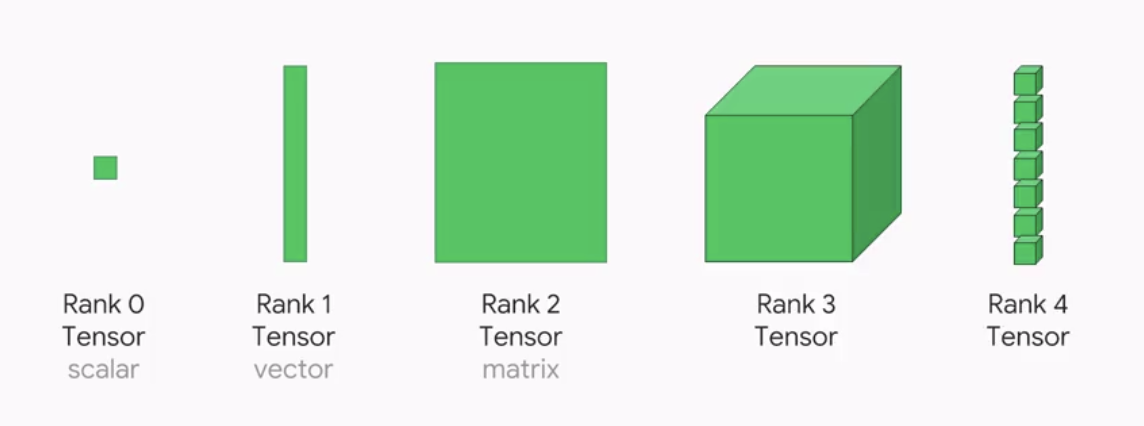 </div>
* We refer to anything which has three or more dimensions as a tensor rather than a matrix.


## Matrix Transpose
* The transpose of a matrix is found by switching its rows with its columns. The transpose of the matrix can be thought of as a mirror image across the main diagonal.

    $A=\left[\begin{matrix}a_{11} & a_{12} & \ldots & a_{1n}\\
a_{21} & a_{22} & \vdots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{matrix}\right]$;<Br>
__Transpose matrix:__ $A^{T}=\left[\begin{matrix}a_{11} & a_{21} & \ldots & a_{m1}\\
a_{12} & a_{22} & \vdots & a_{m2}\\
\vdots & \vdots & \ddots & \vdots\\
a_{1n} & a_{2n} & \ldots & a_{mn}
\end{matrix}\right]$ <Br>
    
    
* In Pytorch you can transpose a matrix in two ways: **torch.t()** or **torch.transpose()**

In [1]:
import torch
a = torch.tensor([
    [1, 2, 3],
    [1, 2, 3]
])
transpose_a = torch.t(a)
print("Transpose matrix of a is",transpose_a)

Transpose matrix of a is tensor([[1, 1],
        [2, 2],
        [3, 3]])


In [3]:
transpose_a = torch.transpose(a,0,1)
print("Transpose matrix of a is",transpose_a)

Transpose matrix of a is tensor([[1, 1],
        [2, 2],
        [3, 3]])


## Inner (dot) product of two vectors
* The inner product takes two **vectors of equal size** and returns a single number (scalar). This is calculated by multiplying the corresponding elements in each vector and adding up all of those products.
* For example: $\left[\begin{array}{c}
1\\
2\\
3
\end{array}\right]\cdot\left[\begin{array}{c}
4\\
5\\
6
\end{array}\right]=1\times4+2\times5+3\times6=32$
* In Pytorch we use **torch.dot()** to calculate innder product of the **vectors that are the same size.**


In [22]:
import torch
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

ab= torch.dot(a, b)
print (a)
print (b)
print ("Inner product of a and b is",ab)

tensor([1, 2, 3])
tensor([4, 5, 6])
Inner product of a and b is tensor(32)


* This operation is also commutative, in which $\boldsymbol{a}\cdot\boldsymbol{b}=\boldsymbol{b}\cdot\boldsymbol{a}$

In [24]:
ba= torch.dot(b, a)
print ("Inner product of b and a is",ba)

Inner product of b and a is tensor(32)


In [26]:
# what if now the vectors are not the same size
a = torch.tensor([1, 2])
c = torch.tensor([3, 2, 1])

ac= torch.dot(a, c)
print ("Inner product of a and b is",ac)

RuntimeError: inconsistent tensor size, expected tensor [2] and src [3] to have the same number of elements, but got 2 and 3 elements respectively

## Matrix-Vector dot product

* Multiplication between a matrix $A$ and vector $x$ is given as:

    $Ax = \left[ \begin{matrix} a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \vdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \ldots & a_{mn} \end{matrix} \right] \left[ \begin{matrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{matrix} \right] = \left[ \begin{matrix} a_{11} x_{1} + a_{12} x_{2} + \ldots + a_{1n} x_{n} \\ a_{21} x_{1} + a_{22} x_{2} + \ldots + a_{2n} x_{n} \\ \ldots \\ a_{m1} x_{1} + a_{m2} x_{2} + \ldots + a_{mn} x_{n} \end{matrix} \right]$
* This method computes matrix dot product with a vector by taking an **𝑚×𝑛** 2D Tensor (matrix) and an **𝑛** 1D Tensor (vector). The result is a **m** 1D Tensor (vector).
* In Pytorch we use **torch.Mv()** to calculate dot product of the **a 2D matrix and a vector.**

In [28]:
import torch
a  =  torch.randn(2, 3) 
b  =  torch.randn(3)
print(a)
print(b)
c = torch.mv(a,b)
print("Matrix-vector dot product is",c)


tensor([[-1.1989, -0.1371, -0.1929],
        [ 0.0316, -0.7662,  1.3266]])
tensor([0.8512, 0.2195, 0.4455])
Matrix-vector dot product is tensor([-1.1365,  0.4497])


## Hadamard Product (Element Wise Multiplication)
* Hadamard product of two vectors/matrices is very similar to matrix addition, elements corresponding to same row and columns of given vectors/matrices are multiplied together to form a new vector/matrix.
* The order of matrices/vectors to be multiplied should be same and the resulting matrix will also be of same order.
* Example: $\left[\begin{array}{cc}
1 & 2\\
3 & 4
\end{array}\right]\circ\left[\begin{array}{cc}
5 & 6\\
7 & 8
\end{array}\right]=\left[\begin{array}{cc}
\left(1\times5\right) & \left(2\times6\right)\\
\left(3\times7\right) & \left(4\times8\right)
\end{array}\right]=\left[\begin{array}{cc}
5 & 12\\
21 & 32
\end{array}\right]$


In [19]:
import torch
a = torch.tensor([[1, 2],[3, 4]])
b = torch.tensor([[5, 6],[7, 8]])

ab = a*b
print (a)
print (b)
print ("Hadamard product of a and b is",ab)

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
Hadamard product of a and b is tensor([[ 5, 12],
        [21, 32]])


## Matrix dot product
* **Dot product of two matrices** requires the matrices to have certain sizes. The number of columns of the first matrix must be equal to the number of rows of the second matrix. Each row of the first matrix will be transposed and multiplied against each column in the second matrix. This is basically a vector multiplication where each row in the first matrix is transposed to make sure it has the same dimension as each column in the second matrix.
* For example:
$\left[\begin{array}{cc}
1 & 2\\
3 & 4\\
5 & 6
\end{array}\right]\cdot\left[\begin{array}{ccc}
{\color{brown}1} & {\color{brown}2} & {\color{brown}3}\\
{\color{brown}4} & {\color{brown}5} & {\color{brown}6}
\end{array}\right]=\left[\begin{array}{ccc}
\left(1\times{\color{brown}1}+2\times{\color{brown}4}\right) & \left(1\times{\color{brown}2}+2\times{\color{brown}5}\right) & \left(1\times{\color{brown}3}+2\times{\color{brown}6}\right)\\
\left(3\times{\color{brown}1}+4\times{\color{brown}4}\right) & \left(3\times{\color{brown}2}+4\times{\color{brown}5}\right) & \left(3\times{\color{brown}3}+4\times{\color{brown}6}\right)\\
\left(5\times{\color{brown}1}+6\times{\color{brown}4}\right) & \left(5\times{\color{brown}2}+6\times{\color{brown}5}\right) & \left(5\times{\color{brown}3}+6\times{\color{brown}6}\right)
\end{array}\right]=\left[\begin{array}{ccc}
9 & 12 & 15\\
19 & 26 & 33\\
29 & 40 & 51
\end{array}\right]$



* In Pytorch we use **torch.mm()** to calculate Dot product of **two 2-dimentional matrices**. This method computes matrix dot product by taking an  𝑚×𝑛  Tensor and an  𝑛×𝑝  Tensor. It can deal with only two-dimensional matrices and not with single-dimensional ones. This function does not support broadcasting. Broadcasting is nothing but the way the tensors are treated when their shapes are different. The smaller Tensor is broadcasted to suit the shape of the wider or larger Tensor for operations.

In [30]:
# Example of matrix dot product
a = torch.arange(1, 7).view(2, 3)
b = torch.arange(1, 7).view(3, 2)
print(a)
print(b)
adotb=torch.mm(a, b)
print ("Dot product of a and b is",adotb)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Dot product of a and b is tensor([[22, 28],
        [49, 64]])


In [32]:
# Example of matrix dot product
a = torch.arange(1, 7).view(3, 2)
b = torch.arange(1, 7).view(2, 3)
print(a)
print(b)
adotb=torch.mm(a, b)
print ("Dot product of a and b is",adotb)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])
Dot product of a and b is tensor([[ 9, 12, 15],
        [19, 26, 33],
        [29, 40, 51]])


* Unlike inner product, matrix multiplication is not commutative, in which $\boldsymbol{a}\cdot\boldsymbol{b}\neq\boldsymbol{b}\cdot\boldsymbol{a}$ <Br>

In [ ]:
# Matrix multiplication is not commutative,
bdota=torch.mm(b, a)
print ("Dot product of b and a is",bdota)

* Example below shows that it is important to make sure the rows of the first matrix have the same number of entries as the columns of the second matrix.

In [34]:
# the dimensions of the matrices is important for matrix multiplication
adota=torch.mm(a, a)
print ("Dot product of a and a is",adota)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

## Matrix product of two tensors (general form)
* In Pytorch we use **torch.matmul(Tensor_1, Tensor_2, out=None)** to compute the multiplication of two vector matrices (single-dimensional matrices), 2D matrices and mixed ones also. This method also supports broadcasting and batch operations. Depending upon the input matrices dimensions, the operation to be done is decided.
* The table below lists the various possible dimensions of the arguments and the operations based on it.
| Argument 1 | Argument 2 | Action taken |
| :- | :- | :-: |
| 1-dimensional | 1-dimensional | The scalar product is calculated
| 2-dimensional | 2-dimensional | General matrix multiplication is done
| 1-dimensional | 2-dimensional | The tensor 1 is pretended with a ‘1’ to match dimension of tensor 2
| 2-dimensional | 1-dimensional | Matrix-vector product is calculated
| 1/N-dimensional (N>2)	 | 1/N-dimensional (N>2)	 | Batched matrix multiplication is done

In [36]:
# both arguments 1D
vec_1 = torch.tensor([3, 6, 2])
vec_2 = torch.tensor([4, 1, 9])
  
print("Single dimensional tensors :", torch.matmul(vec_1, vec_2))
  


Single dimensional tensors : tensor(36)


In [38]:
# both arguments 2D
mat_1 = torch.tensor([[1, 2, 3],
                      [4, 3, 8],
                      [1, 7, 2]])
  
mat_2 = torch.tensor([[2, 4, 1],
                      [1, 3, 6],
                      [2, 6, 5]])
  
out = torch.matmul(mat_1, mat_2)
  
print("\n3x3 dimensional tensors :\n", out)


3x3 dimensional tensors :
 tensor([[10, 28, 28],
        [27, 73, 62],
        [13, 37, 53]])


In [40]:
# Arguments of different dimensions
# first argument 1D and second argument 2D
mat1_1 = torch.tensor([3, 6, 2])
  
mat1_2 = torch.tensor([[1, 2, 3],
                       [4, 3, 8],
                       [1, 7, 2]])
  
out_1 = torch.matmul(mat1_1, mat1_2)
print("\n1D-2D multiplication :\n", out_1)
  




1D-2D multiplication :
 tensor([29, 38, 61])


In [42]:
# first argument 2D and second argument 1D
mat2_1 = torch.tensor([[2, 4, 1],
                       [1, 3, 6],
                       [2, 6, 5]])
  
mat2_2 = torch.tensor([4, 1, 9])
  
# assigning to output tensor
out_2 = torch.matmul(mat2_1, mat2_2)
  
print("\n2D-1D multiplication :\n", out_2)


2D-1D multiplication :
 tensor([21, 61, 59])


In [44]:
# N-dimensional argument (N>2)
# creating Tensors using randn()
mat_1 = torch.randn(2, 3, 3)
mat_2 = torch.randn(3)
  
# printing the matrices
print("matrix A :\n", mat_1)
print("\nmatrix B :\n", mat_2)
  
# output
print("\nOutput :\n", torch.matmul(mat_1, mat_2))

matrix A :
 tensor([[[ 1.9742, -0.3101,  0.9207],
         [-0.5845,  0.3964,  0.2774],
         [ 0.1423, -0.6356, -1.0601]],

        [[ 0.7488,  0.0633, -0.1190],
         [ 0.2655, -1.8284, -1.4647],
         [ 0.2355, -0.5253,  0.6223]]])

matrix B :
 tensor([ 0.7186, -1.4878,  1.3330])

Output :
 tensor([[ 3.1072, -0.6399, -0.3651],
        [ 0.2852,  0.9588,  1.7803]])
